In [1]:
# 경고 메시지 숨기기
import warnings
warnings.filterwarnings(action="ignore")

# 서포트 벡터 머신

## 분류

**1. Dataset 구조**
- 파일명 : classification.csv
- 컬럼 3개
- 타깃변수 : success

**2. 문제**

1) class 분포 시각화

2) 서포트벡터머신을 이용해서 success를 분류하는 모델 만들기

3) 하이퍼파라미터 C값을 두가지 종류로 학습한 뒤 모델 결과 차이점 확인하기

### 1) class 분포 시각화

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c = pd.read_csv('./data/classification.csv')
c

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


In [4]:
c.describe()

,age,interest,success
count,297.000000,297.000000,297.000000
mean,23.709718,46.986527,0.569024
std,8.864000,21.956447,0.496049
min,2.347560,-0.852800,0.000000
25%,17.002148,28.689067,0.000000
50%,23.283644,45.695926,1.000000
75%,30.661149,65.171876,1.000000
max,45.773729,97.175508,1.000000


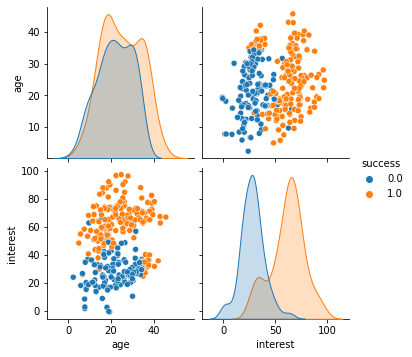

In [5]:
# 클래스 분포 산포도로 살펴보기
sns.pairplot(hue="success", data=c) ; 

In [9]:
#설명변수 X와 타깃변수 y를 설정한 뒤, 7:3 비율로 학습데이터와 평가데이터를 분리하기
from sklearn.model_selection import train_test_split

X = c[["age","interest"]] 
y = c["success"] 

train_X, test_X, train_y, test_y = train_test_split(X, y, stratify = y, 
                                                   train_size = 0.7, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(207, 2) (90, 2) (207,) (90,)


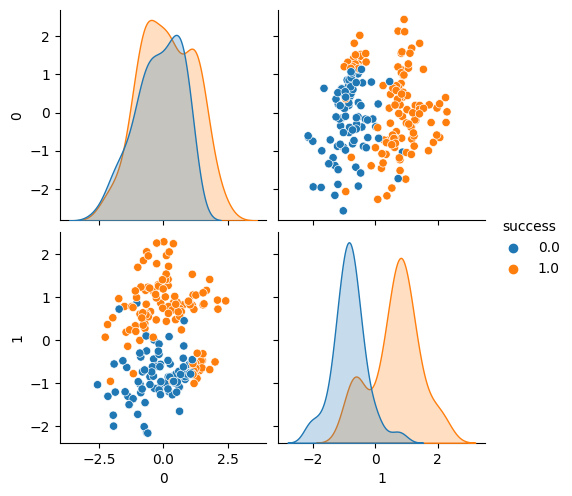

In [10]:
# StandardScaler로 스케일링 후 산점도 그리기 : SVM은 스케일에 민감하기 때문에 좀더 예측력 높은 결정경계를 생성하기 위하여
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)

sns.pairplot(data = pd.concat([pd.DataFrame(train_X),
                              train_y.reset_index(drop=True)],
                             axis=1),
            hue = "success");

In [13]:
#(참고) train_y에 reset_index를 해야하는 이유
train_y.head()

67    0.0
94    0.0
76    1.0
87    0.0
75    1.0
Name: success, dtype: float64

In [14]:
pd.concat([pd.DataFrame(train_X),train_y])

,0,1
0,-0.111493,-0.553643
1,0.832115,-0.692107
2,0.019334,2.295119
3,0.727609,-0.791890
4,-1.091025,0.342380
...,...,...
16,1.000000,NaN
44,1.000000,NaN
163,1.000000,NaN
103,0.000000,NaN


In [18]:
train_X.shape

(207, 2)

In [19]:
train_y.shape

(207,)

### 2) 서포트벡터머신을 이용해서 success를 분류하는 모델 만들기

In [10]:
# SVC 모델 학습
from sklearn.svm import SVC

clf = SVC(C=0.5) #kernel default= rbf
clf.fit(train_X, train_y)

SVC(C=0.5)

In [11]:
#모델 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

test_X_scal = scaler.transform(test_X)

pred = clf.predict(test_X_scal)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print()
print("정확도\t{}%".format(round(test_acc*100,2)))
print("정밀도\t{}%".format(round(test_prc*100,2)))
print("재현율\t{}%".format(round(test_rcll*100,2)))
print("F1\t{}%".format(round(test_f1*100,2)))

[[37  2]
 [ 2 49]]

정확도	95.56%
정밀도	96.08%
재현율	96.08%
F1	96.08%


### 3) 하이퍼파라미터 C값을 두가지 종류로 학습한 뒤 모델 결과 차이점 확인하기

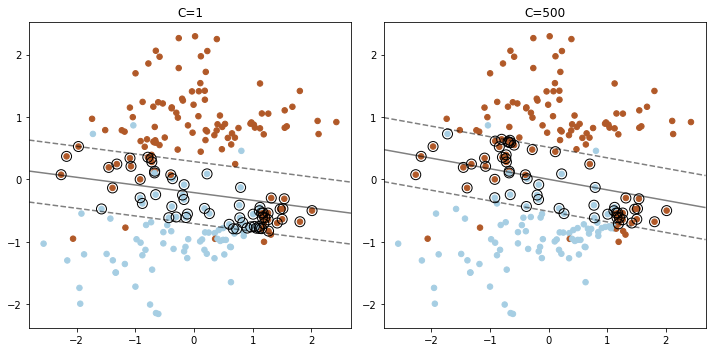

In [12]:
# C에 따른 마진 변화 확인하기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

plt.figure(figsize=(10,5))
for i, C in enumerate([1,500]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(train_X, train_y)
    
    #decision function으로 서포트 벡터 얻기
    decision_function = clf.decision_function(train_X)
    support_vector_indices = np.where(np.abs(decision_function)<=1+1e-15)[0]
    support_vectors = train_X[support_vector_indices]
    
    plt.subplot(1,2, i+1)
    plt.scatter(train_X[:,0], train_X[:,1], c=train_y, s=30, cmap=plt.cm.Paired) #c : 마커 색상, s: 마커 사이즈
    ax = plt.gca() #현재 axes 객체 반환
    xlim = ax.get_xlim() #현재 x축의 범위
    ylim = ax.get_ylim() #현재 y축의 범위
    xx, yy = np.meshgrid(  #np.meshgrid : 격자선 그리기
    np.linspace(xlim[0], xlim[1],50), np.linspace(ylim[0], ylim[1],50)) #x축 : np.linspace(xlim[0], xlim[1],50)=>x최소범위~x최대범위 숫자개수 50개 되도록 나누기 , y축 :  np.linspace(ylim[0], ylim[1],50)) => y최소범위~y최대범위 숫자 개수 50개 되도록 나누기 
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) #np.c_() : 배열 옆으로 붙이기 / np.ravel() : 평탄화(1차 배열로 변환)
    Z = Z.reshape(xx.shape) 
    plt.contour(xx, yy, Z, #plt.contour: 등치선(동일한 값 같는 인접한 점 연결한 선 그리기)
               colors="k",
               levels=[-1,0,1], #등고선 위치 표시
               alpha= 0.5,
               linestyles=["--","-","--"])
    plt.scatter(
    support_vectors[:,0], support_vectors[:,1],
    s=100,
    linewidth=1,
    facecolors="none", #배경색
    edgecolors="k")
    plt.title("C="+str(C))
    
plt.tight_layout() #여백 조절
plt.show()

# C의 값이 커지면 마진과 옳지 않은 데이터의 허용치 증가

In [13]:
#(참고) decision function 결과 : 각 샘플이 
decision_function = clf.decision_function(train_X)
decision_function[:5]

#SVC, SVR에서는 clf.support_ 로 support vector index 쉽게 구할 수 있음

array([-1.12077905, -1.07947514,  4.47047493, -1.30824969,  0.30147082])

## 회귀

**문제**

1) 샘플 데이터 생성

2) 회귀 모델 학습

3) 성능 확인

4) 시각화

### 1) 샘플 데이터 생성

In [20]:
#샘플 데이터 생성하기
import numpy as np

x = np.sort(5 * np.random.rand(40,1), axis= 0)
y = np.sin(x).ravel()

print(x[0:6], "\n\n",y[0:10])

[[0.20599733]
 [0.27452998]
 [0.28206821]
 [0.41551218]
 [0.45261331]
 [0.47160423]] 

 [0.20454351 0.27109455 0.27834272 0.40365858 0.43731719 0.45431599
 0.90050987 0.91956667 0.95219035 0.99751426]


In [21]:
x.shape, y.shape

((40, 1), (40,))

In [23]:
# 타깃 데이터에 노이즈 추가하기
y[::5] += 3 * (0.5 - np.random.rand(8)) #y 5번째 값마다 노이즈 추가

print(y[0:10])

[-0.23888624  0.27109455  0.27834272  0.40365858  0.43731719  1.40569244
  0.90050987  0.91956667  0.95219035  0.99751426]


### 2) 회귀 모델 학습

In [24]:
# 커널 함수를 바꿔가며 모델 생성 후 데이터 학습
from sklearn.svm import SVR

svr_rbf = SVR(kernel = "rbf", C = 100, gamma = 0.1, epsilon = 0.1)
svr_lin = SVR(kernel = "linear", C = 100, gamma = "auto")
svr_poly = SVR(kernel= "poly", C = 100, gamma = "auto", degree = 3, epsilon = 0.1, coef0 = 1) #epsilon '=. 마진 넓이

svr_rbf.fit(x,y)
svr_lin.fit(x,y)
svr_poly.fit(x,y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

### 3) 성능 확인

In [25]:
#성능 비교
rbf_pred = svr_rbf.predict(x)
lin_pred = svr_lin.predict(x)
poly_pred = svr_poly.predict(x)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
preds = [rbf_pred, lin_pred, poly_pred]
kernel = ["Random_Forest", "Linear","Polynomial"]
evls = ["mse", "rmse", "mae"]

results = pd.DataFrame(index = kernel, columns = evls)

for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]["mse"] = round(mse,2)
    results.loc[nm]["rmse"] = round(rmse,2)
    results.loc[nm]["mae"] = round(mae,2)
results

,mse,rmse,mae
Random_Forest,0.16,0.4,0.2
Linear,0.37,0.61,0.39
Polynomial,0.16,0.39,0.18


### 4) 시각화

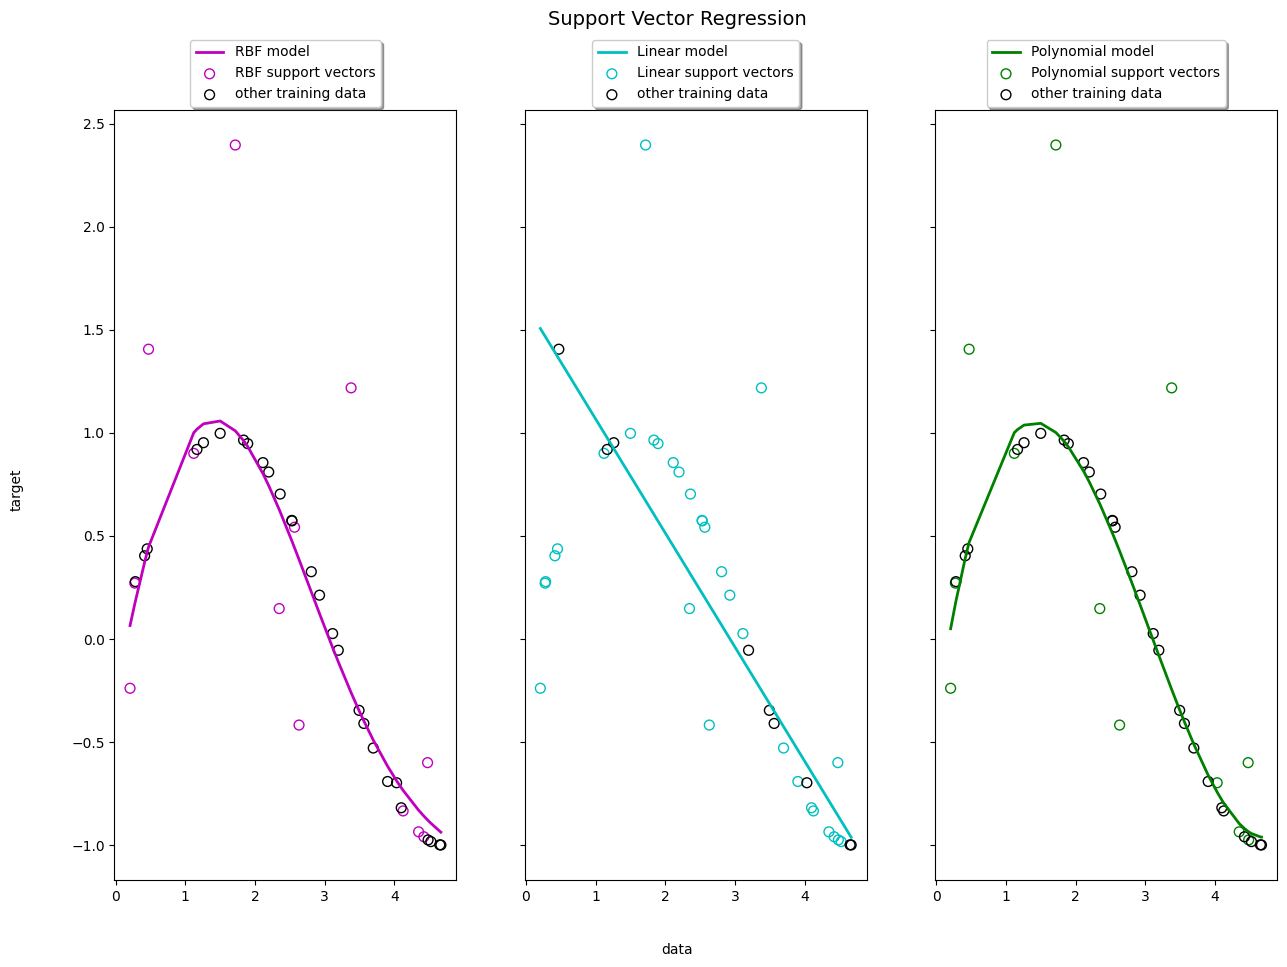

In [26]:
# 시각화
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF","Linear","Polynomial"]
model_color = ["m","c","g"]

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 10), sharey=True) #sharey=True : 축 공유 <-> False : 축 독립적
for ix, svr in enumerate(svrs):
    axes[ix].plot(x,
                 svr.fit(x,y).predict(x),
                 color = model_color[ix],
                 lw=lw, #lw = linewidth
                 label="{} model".format(kernel_label[ix]))
    axes[ix].scatter(
        x[svr.support_],
        y[svr.support_],
        facecolor = "none",
        edgecolor = model_color[ix],
        s = 50,
        label = "{} support vectors".format(kernel_label[ix]))
    axes[ix].scatter(
        x[np.setdiff1d(np.arange(len(x)), svr.support_)], #첫번째 인자배열에서 두번째 인자배열을 뺀 차집합
        y[np.setdiff1d(np.arange(len(x)), svr.support_)],
        facecolor = "none",
        edgecolor = "k",
        s = 50, 
        label = "other training data")
    axes[ix].legend(
        loc = "upper center",
        bbox_to_anchor = (0.5, 1.1), # 바운딩 박스 밖에서 위치 다루기
        ncol = 1,
        fancybox = True, #모서리 둥글게
        shadow = True)

fig.text(0.5, 0.04, "data", ha = "center", va = "center")
fig.text(0.06, 0.5, "target", ha = "center", va = "center", rotation = "vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

# K-최근접 이웃(KNN)

## 분류

**1. Dataset 구조**
- 파일명 : indian_liver_patient.csv
- 컬럼 11개
- 목표 변수 : Dataset

**2. 문제**

1) 전처리(범주형 처리, 결측치)

2) KNN 분류기를 이용해서 Dataset 분류하는 모델 만들기


In [31]:
# 데이터 불러오기 및 목표 변수 확인
import pandas as pd
liver = pd.read_csv('./data/indian_liver_patient.csv')
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [32]:
liver.Dataset.unique() 

array([1, 2])

### 1) 전처리(범주형 처리, 결측치)

In [33]:
#성별(Gender) 변수를 One-hot Encoding
import numpy as np

liver.Gender = np.where(liver.Gender=='Female',0,1)  #np.where(조건,조건이 True일 때 값,조건이  False일 때 값)
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [34]:
#데이터 결측치 확인
print(liver.isna().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [35]:
# 결측치 제거 : 결측치 Albumin_and_Globulin_Ratio 변수에서 4개 => 사이즈가 작아서
liver.dropna(axis=0, inplace=True)

liver.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

### 2) KNN 분류기를 이용해서 Dataset 분류하는 모델 만들기

In [39]:
#설명 변수와 타겟 변수 설정 뒤 7:3 비율로 학습 데이터와 평가 데이터로 분리
from sklearn.model_selection import train_test_split

X = liver[liver.columns.difference(['Dataset'])]  #dataframe.columns.difference([제외할 컬럼])
y = liver['Dataset']

train_X, test_X, train_y, test_y = train_test_split(X,y, stratify = y, 
                                                   train_size=0.7, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(405, 10) (174, 10) (405,) (174,)


In [40]:
# KNN 분류기 생성 후 데이터 학습
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=15, weights= 'uniform') #KNN 분류기 생성
clf.fit(train_X, train_y) #모델.fit(X,y) : 모델 학습

KNeighborsClassifier(n_neighbors=15)

In [41]:
# 성능 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(test_X)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll= recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print()
print("정확도\t{}%".format(round(test_acc*100,2)))
print("정밀도\t{}%".format(round(test_prc*100,2)))
print("재현율\t{}%".format(round(test_rcll*100,2)))
print("F1\t{}%".format(round(test_f1*100,2)))

[[106  18]
 [ 39  11]]

정확도	67.24%
정밀도	73.1%
재현율	85.48%
F1	78.81%


## 회귀

**문제**

1) 샘플 데이터 생성

2) 회귀 모델 학습

3) 성능 확인

4) 시각화

### 1) 샘플 데이터 생성

In [50]:
# 넘파이를 사용해 임의로 데이터 생성하기
import numpy as np

np.random.seed(0)
x = np.sort(5*np.random.rand(400,1),axis=0)
T = np.linspace(0,5,500)[:,np.newaxis] #np.linspace(0,5,500) : shape (500,) -> np.linspace(0,5,500)[:,np.newaxis]: shape (500,1)
y = np.sin(x).ravel()

print(X[:10],'\n')
print(T[:10],'\n')
print(y[:10],'\n')

print(x.shape, T.shape, y.shape)

   Age  Alamine_Aminotransferase  Albumin  Albumin_and_Globulin_Ratio  \
0   65                        16      3.3                        0.90   
1   62                        64      3.2                        0.74   
2   62                        60      3.3                        0.89   
3   58                        14      3.4                        1.00   
4   72                        27      2.4                        0.40   
5   46                        19      4.4                        1.30   
6   26                        16      3.5                        1.00   
7   29                        14      3.6                        1.10   
8   17                        22      4.1                        1.20   
9   55                        53      3.4                        1.00   

   Alkaline_Phosphotase  Aspartate_Aminotransferase  Direct_Bilirubin  Gender  \
0                   187                          18               0.1       0   
1                   699           

In [51]:
# 타겟 데이터에 노이즈 추가
y[::1] += 1 * (0.5 - np.random.rand(400))
print(y[:10])

[ 0.12221572 -0.37218521  0.45892201 -0.37916555 -0.28793668  0.12789339
  0.26577577  0.36106673 -0.01864595  0.56729386]


### 2) 회귀 모델 학습

In [52]:
# 데이터를 7:3의 비율로 학습데이터와 평가데이터로 나누기
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x,y,
                                                    train_size=0.7, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(280, 1) (120, 1) (280,) (120,)


In [53]:
#KNN 회귀 모델 만들기
from sklearn.neighbors import KNeighborsRegressor

knn_uni = KNeighborsRegressor(n_neighbors=20, weights='uniform')
knn_dis = KNeighborsRegressor(n_neighbors=20, weights='distance')

knn_uni.fit(train_x, train_y)


KNeighborsRegressor(n_neighbors=20)

In [54]:
knn_dis.fit(train_x, train_y)

KNeighborsRegressor(n_neighbors=20, weights='distance')

### 3) 성능 확인

In [55]:
# 성능 비교
uni_pred = knn_uni.predict(test_x)
dis_pred = knn_dis.predict(test_x)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

preds = [uni_pred, dis_pred]
weights = ['uniform','distance']
evls = ['mse','rmse','mae']

results = pd.DataFrame(index=weights, columns = evls)

for pred, nm in zip(preds, weights):
    mse = mean_squared_error(test_y, pred)
    mae = mean_absolute_error(test_y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse'] = round(mse,2)
    results.loc[nm]['rmse'] = round(rmse,2)
    results.loc[nm]['mae'] = round(mae,2)
    
results  

,mse,rmse,mae
uniform,0.1,0.31,0.27
distance,0.11,0.34,0.28


### 4) 시각화

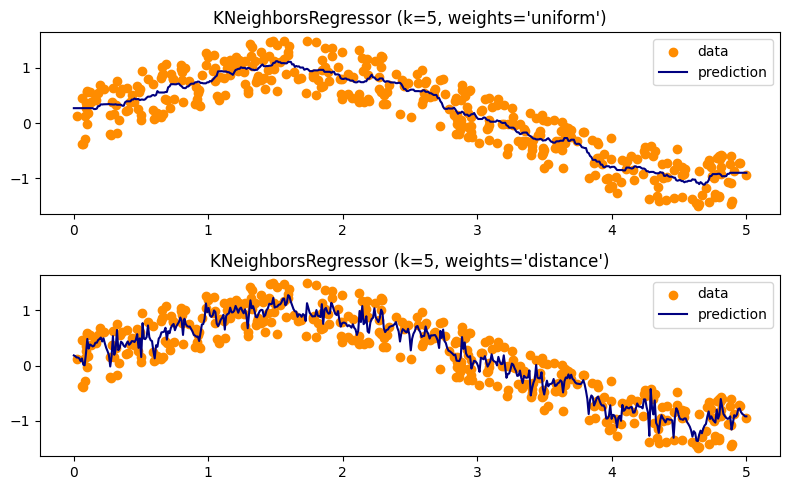

In [56]:
# 시각화를 이용한 비교
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for i, weights in enumerate(['uniform','distance']):
    knn = KNeighborsRegressor(n_neighbors=20, weights = weights)
    
    y_ = knn.fit(x,y).predict(T)
    
    plt.subplot(2,1,i+1)
    plt.scatter(x,y,color="darkorange",label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k=%i, weights='%s')"%(5,weights))
    
plt.tight_layout()
plt.show()

# 의사결정나무(Decision Tree)

## 분류

**1. Dataset 구조**
- 파일명 : credit_final.csv
- 컬럼 21개
- 타깃변수 : credit.rating

**2. 문제**

1) 의사결정나무를 이용해서 credit.rating를 분류하는 모델 만들기

2) 성능 평가

3) ROC Curve를 그리고 AUROC 계산하기

4) 가장 중요한 변수 찾기

5) 의사결정나무 모델 시각화

### 0) 데이터 불러오기

In [57]:
# 데이터 불러오기
import pandas as pd
credit = pd.read_csv("./data/credit_final.csv")
credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


### 1) 의사결정나무를 이용해서 credit.rating를 분류하는 모델 만들기

In [58]:
#설명변수 X와 종속변수 y 분리
feature_columns = list(credit.columns.difference(["credit.rating"]))
X = credit[feature_columns]
y = credit["credit.rating"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, 
                                                    test_size=0.3, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 20) (300, 20) (700,) (300,)


In [59]:
# 모델 학습
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

### 2) 성능 평가

In [60]:
# 성능 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred=clf.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print("정확도\t{}%".format(round(test_acc*100,2)))
print("정밀도\t{}%".format(round(test_prc*100,2)))
print("재현율\t{}%".format(round(test_rcll*100,2)))
print("F1\t{}%".format(round(test_f1*100,2)))

정확도	71.0%
정밀도	74.9%
재현율	88.1%
F1	80.96%


In [61]:
# classification report로 분석 결과 확인
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.53      0.31      0.39        90
           1       0.75      0.88      0.81       210

    accuracy                           0.71       300
   macro avg       0.64      0.60      0.60       300
weighted avg       0.68      0.71      0.68       300



### 3) ROC Curve를 그리고 AUROC 계산하기


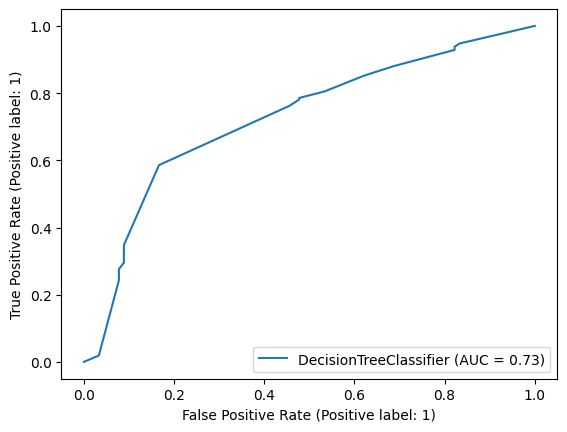

ROC_AUC_score:  0.7264285714285714


In [62]:
# ROC 곡선 시각화 후 곡선 면적 계산하기
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score
plot_roc_curve(clf, X_test, y_test)
plt.show()
R_A_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print("ROC_AUC_score: ", R_A_score)

### 4) 가장 중요한 변수 찾기

In [63]:
# 변수 중요도 확인
importances = clf.feature_importances_
column_nm = pd.DataFrame(X.columns)
feature_importances = pd.concat([column_nm, 
                                pd.DataFrame(importances)],
                               axis=1)
feature_importances.columns = ["feature_nm","importances"]
print(feature_importances)

                        feature_nm  importances
0                  account.balance     0.263282
1                              age     0.114826
2                   apartment.type     0.021665
3                     bank.credits     0.000000
4                    credit.amount     0.086741
5           credit.duration.months     0.187908
6                   credit.purpose     0.059083
7                   current.assets     0.000000
8                       dependents     0.000000
9              employment.duration     0.000000
10                  foreign.worker     0.000000
11                       guarantor     0.000000
12                installment.rate     0.000000
13                  marital.status     0.013993
14                      occupation     0.011790
15                   other.credits     0.034003
16  previous.credit.payment.status     0.123825
17              residence.duration     0.029803
18                         savings     0.053080
19                       telephone     0

In [42]:
# !pip install pydot
# !pip install pydotplus
# !pip install graphviz

### 5) 의사결정나무 모델 시각화

- graphviz 모듈을 사용하기 위해서는 설치 파일 다운로드 필요
- (링크 : https://graphviz.org/download/)

**시스템 경로 지정 필수!**
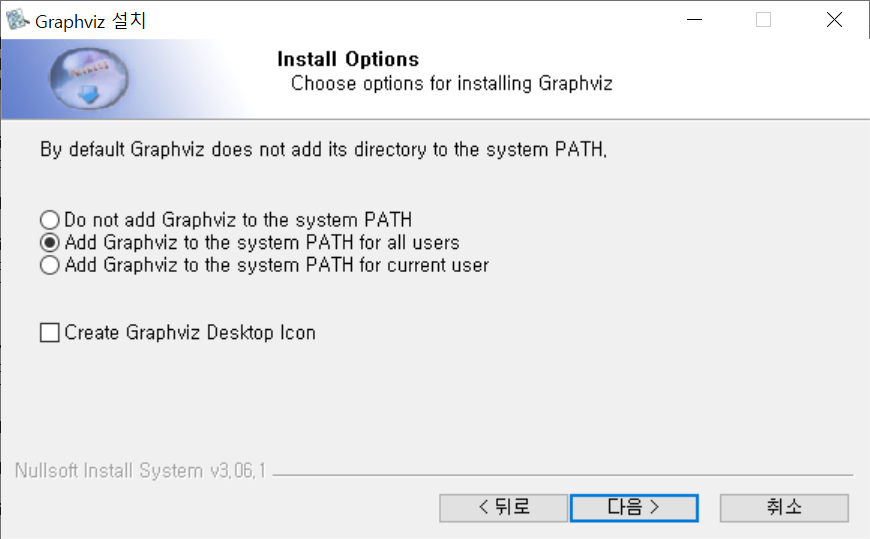

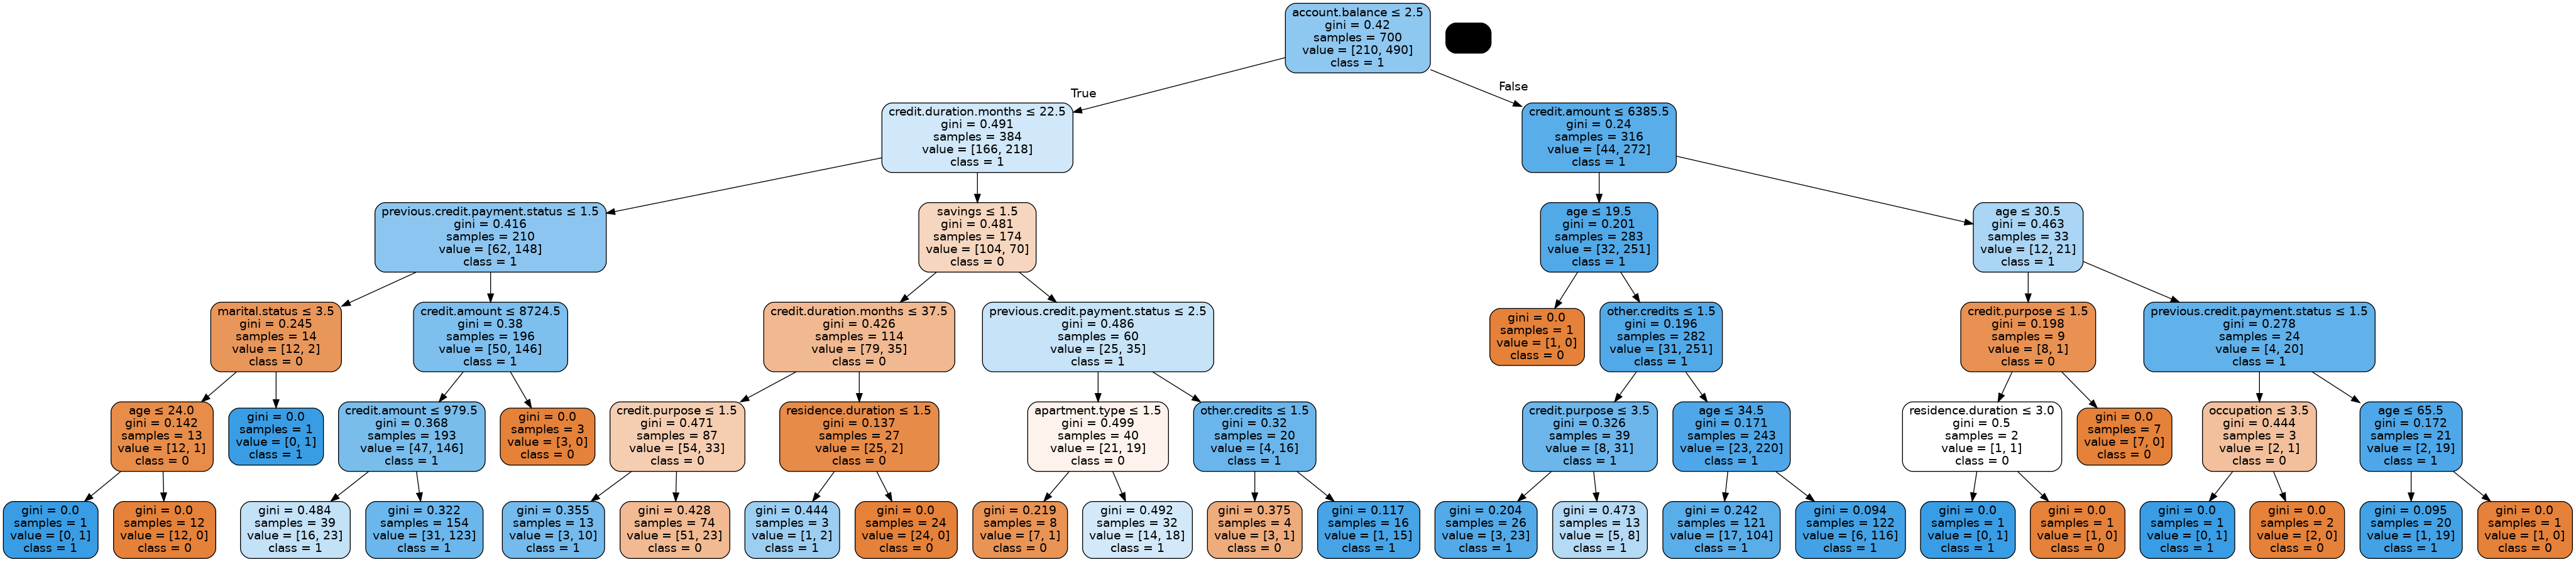

In [67]:
# 의사결정 시각화1 - graphviz
import numpy as np
feature_names = feature_columns
target_names = np.array(["0","1"])

import pydot
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
dt_dot_data= export_graphviz(clf, feature_names = feature_names,
                            class_names = target_names,
                            filled=True, rounded=True,
                            special_characters=True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

from IPython.display import Image
Image(dt_graph.create_png())

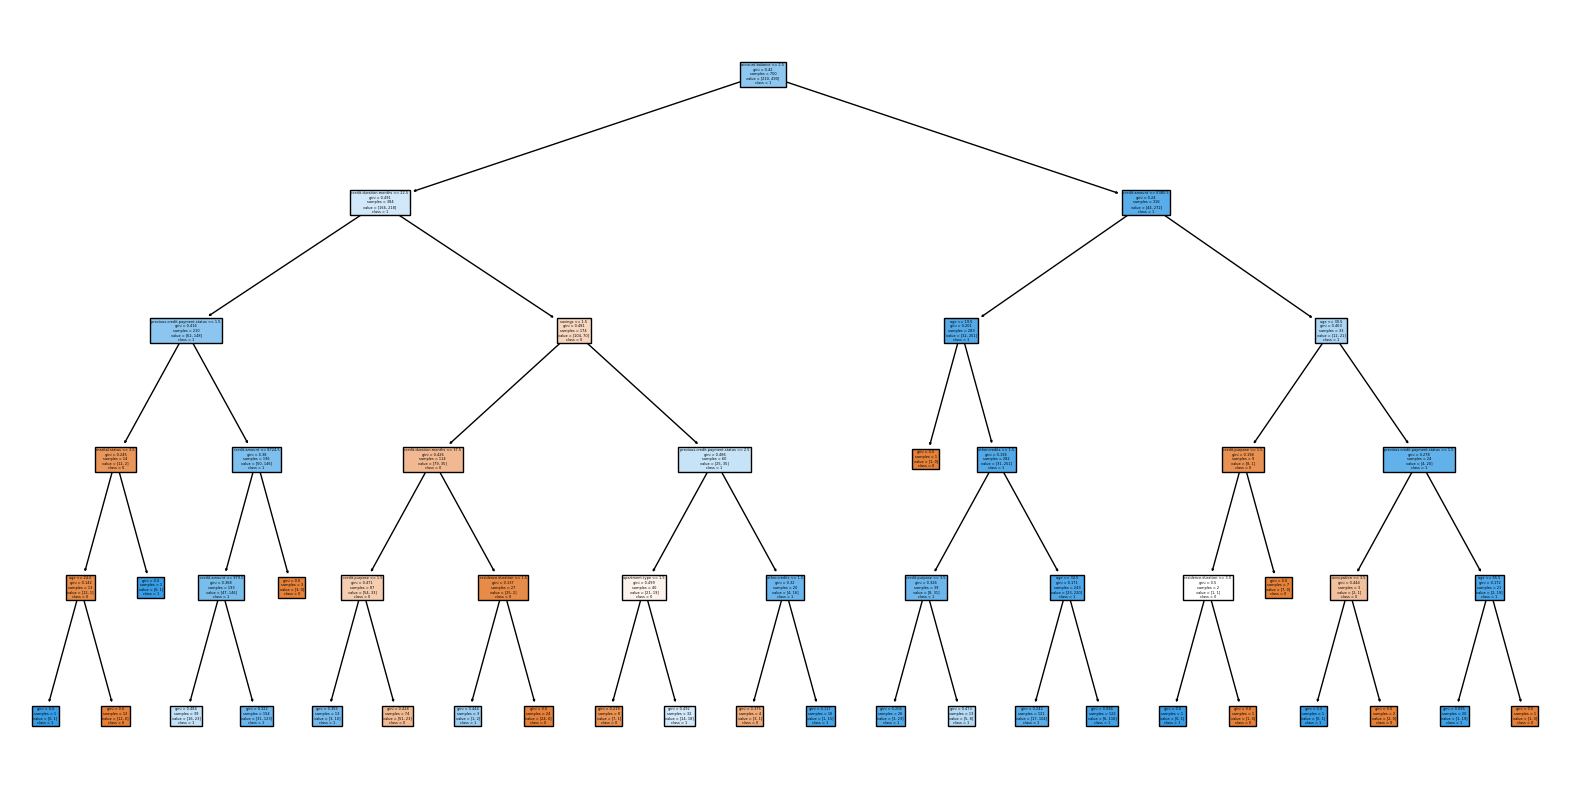

In [68]:
# 의사결정 시각화2 - sklearn.tree.plot_tree
from sklearn import tree

fig = plt.figure(figsize = (20,10))
dt_graph2 = tree.plot_tree(clf,
                   feature_names = feature_names,
                   class_names = target_names,
                   filled = True)

plt.savefig("dt_graph2.png")

## 회귀

**문제**

1) 샘플 데이터 생성

2) 회귀 모델 학습

3) 성능 확인

4) 시각화

### 1) 샘플 데이터 생성


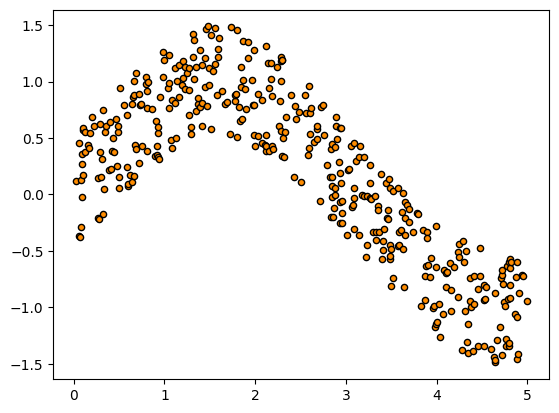

In [69]:
#임의 데이터 생성하기
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.sort(5*np.random.rand(400,1),axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(x).ravel()

#노이즈 추가하기
y[::1] += 1 * (0.5 - np.random.rand(400))
plt.scatter(x, y, s=20, edgecolor="black", c = "darkorange", label = "data") ;

### 2) 회귀 모델 학습

In [70]:
# 7: 3 비율로 학습데이터와 평가데이터 분할
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, 
                                                    train_size=0.7, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(280, 1) (120, 1) (280,) (120,)


In [71]:
regr_1 = DecisionTreeRegressor(max_depth = 2)
regr_2 = DecisionTreeRegressor(max_depth = 5)

### 3) 성능 확인

In [72]:
# 성능 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
y_1 = regr_1.fit(train_x, train_y).predict(test_x)
y_2 = regr_2.fit(train_x, train_y).predict(test_x)
preds=[y_1, y_2]
weights=["max depth = 2", "max depth = 5"]
evls = ["mse","rmse","mae"]
results = pd.DataFrame(index = weights, columns = evls)
for pred, nm in zip(preds, weights):
    mse = mean_squared_error(test_y, pred)
    mae = mean_absolute_error(test_y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]["mse"] = round(mse,2)
    results.loc[nm]["rmse"] = round(rmse,2)
    results.loc[nm]["mae"] = round(mae,2)
results

,mse,rmse,mae
max depth = 2,0.12,0.35,0.29
max depth = 5,0.12,0.35,0.3


### 4) 시각화

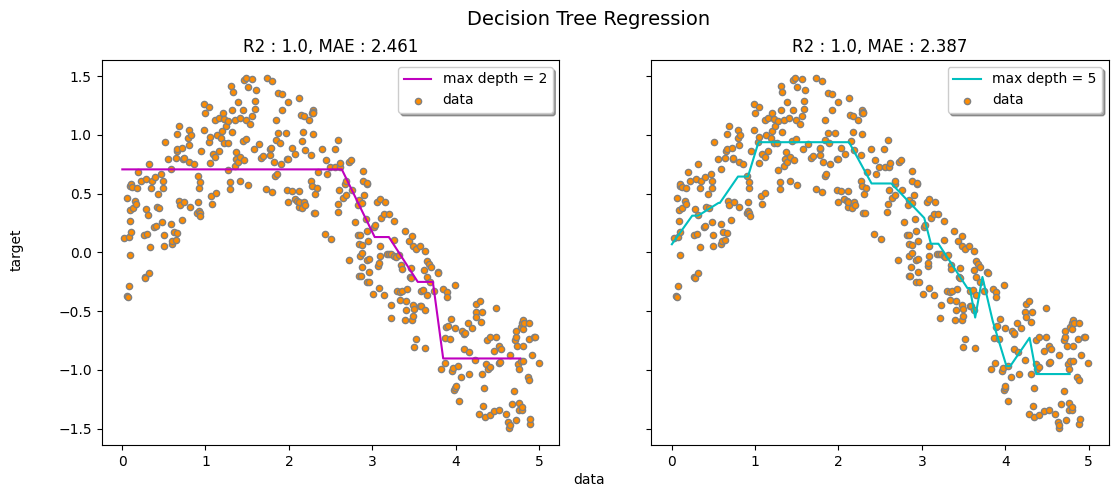

In [73]:
# 예측 결과 시각화
x_test = np.sort( 5 * np.random.rand(40, 1), axis=0)

regrs = [regr_1, regr_2]
depths = ["max depth = 2", "max depth = 5"]
model_color = ["m","c"]
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize= (13, 5))

for ix, regr in enumerate(regrs):
    
    pred = regr.fit(x, y).predict(x_test)
    r2 = regr.score(x_test, pred)
    mae = mean_absolute_error(x_test, pred)
    
    axes[ix].plot(x_test, pred,
                 color = model_color[ix],
                 label="{}".format(depths[ix]))
    axes[ix].scatter(x, y,
                    s=20,
                    edgecolor = "gray",
                    c = "darkorange",
                    label = "data")
    axes[ix].legend(loc = "upper right", ncol = 1, fancybox = True, shadow = True)
    
    axes[ix].set_title("R2 : {r}, MAE : {m}".format(r=round(r2,3), m = round(mae,3)))
fig.text(0.5, 0.04, "data", ha = "center", va = "center")
fig.text(0.06, 0.5, "target", ha = "center", va = "center", rotation = "vertical")
fig.suptitle("Decision Tree Regression", fontsize = 14)
plt.show()

# 연습해보기

## SVM 분류
**1. Dataset 구조**
- 파일명 : classification.csv
- 컬럼 3개
- 타깃변수 : success

**2. 문제**

1) class 분포 시각화

2) 서포트벡터머신을 이용해서 success를 분류하는 모델 만들기

3) 하이퍼파라미터 C값을 두가지 종류로 학습한 뒤 모델 결과 차이점 확인하기


## KNN 분류
**1. Dataset 구조**
- 파일명 : indian_liver_patient.csv
- 컬럼 11개
- 목표 변수 : Dataset

**2. 문제**

1) 전처리(범주형 처리, 결측치)

2) KNN 분류기를 이용해서 Dataset 분류하는 모델 만들기




## 의사결정나무 분류
**1. Dataset 구조**
- 파일명 : credit_final.csv
- 컬럼 21개
- 타깃변수 : credit.rating

**2. 문제**

1) 의사결정나무를 이용해서 credit.rating를 분류하는 모델 만들기

2) 성능 평가

3) ROC Curve를 그리고 AUROC 계산하기

4) 가장 중요한 변수 찾기

5) 의사결정나무 모델 시각화